<a href="https://colab.research.google.com/github/30kirtana/ML-project/blob/main/stepbystep_all_classificationmodel_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import pandas as pd

In [9]:
path = "../input/human-activity-recognition-with-smartphones/"

In [10]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [11]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [12]:
df_train.shape

(7352, 563)

In [13]:
df_test.shape

(2947, 563)

In [14]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

# Human Activity Recognition

In this notebook, we are trying to predict the Activity of a user. As you can it is a Muliclassification Problem. This notebook is to build a model that can predict whether a person is `Laying`, `Standing` , `Sitting`, `Walking`, `Walking_upstairs`, or `Walking_downstairs`

Initially, the information in this dataset is the measurements from the accelerometer, gyroscope, magnetometer, and GPS of the smartphone. 

#### Data Information 
From the website: 

http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (`WALKING`, `WALKING_UPSTAIRS`, `WALKING_DOWNSTAIRS`, `SITTING`, `STANDING`, `LAYING`) wearing a smartphone <b>(Samsung Galaxy S II) </b> on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

### Let's talk about the features (columns)

We see, there are `563 individual features(columns)`. 

1. The features selected for this database come from the <b> accelerometer </b> and <b> gyroscope </b> 3-axial raw signals <b> tAcc-XYZ </b>. These time domain signals (prefix <b>'t'</b> to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. 


2. Similarly, the acceleration signal was then separated into body and gravity acceleration signals <b> (tBodyAcc-XYZ and tGravityAcc-XYZ) </b> using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 


3. Subsequently, the body linear acceleration and angular velocity were derived in time to obtain <b> Jerk signals (tBodyAccJerk-XYZ </b> and <b> tBodyGyroJerk-XYZ) </b>. Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm `(tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag)`

`jerk is the rate at which an object's acceleration changes with respect to time`


4. Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing

`fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. `

(Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  


5. <b>'-XYZ' </b> is used to denote 3-axial signals in the X, Y and Z directions.

    - tBodyAcc-XYZ
    - tGravityAcc-XYZ
    - tBodyAccJerk-XYZ
    - tBodyGyro-XYZ
    - tBodyGyroJerk-XYZ
    - tBodyAccMag
    - tGravityAccMag
    - tBodyAccJerkMag
    - tBodyGyroMag
    - tBodyGyroJerkMag
    - fBodyAcc-XYZ
    - fBodyAccJerk-XYZ
    - fBodyGyro-XYZ
    - fBodyAccMag
    - fBodyAccJerkMag
    - fBodyGyroMag
    - fBodyGyroJerkMag`
    
    

6. The set of variables that were estimated from these signals are: 

    - `mean()`: Mean value
    - `std()`: Standard deviation
    - `mad()`: Median absolute deviation 
    - `max()`: Largest value in array
    - `min()`: Smallest value in array
    - `sma()`: Signal magnitude area
    - `energy()`: Energy measure. Sum of the squares divided by the number of values. 
    - `iqr()`: Interquartile range 
    - `entropy()`: Signal entropy
    - `arCoeff()`: Autorregresion coefficients with Burg order equal to 4
    - `correlation()`: correlation coefficient between two signals
    - `maxInds()`: index of the frequency component with largest magnitude
    - `meanFreq()`: Weighted average of the frequency components to obtain a mean frequency
    - `skewness()`: skewness of the frequency domain signal 
    - `kurtosis()`: kurtosis of the frequency domain signal 
    - `bandsEnergy()`: Energy of a frequency interval within the 64 bins of the FFT of each window.
    - `angle()`: Angle between to vectors.
    

7. Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:

    `gravityMean
     tBodyAccMean
     tBodyAccJerkMean
     tBodyGyroMean
     tBodyGyroJerkMean`
 
 That's too much information. 

.

## What's our Plan?


### `Outline`

- <b>1. Read Dataset </b>


- <b>2. Datset Cleaning </b>
    - 2.1 Outliers
    - 2.2 Filling null values
    - 2.3 Check for data imbalance
    - 2.4 Correcting some feature names


   
- <b>3. Exploratory Data Analysis </b>


- <b>4. Data Preprocessing </b>
    - 4.1 Encoding categorical variables
    - 4.2 Normalization
    - 4.3 Split Training and testing
    
    
    
- <b>5. Models, Hyperparameter Tuning and Cross Validation</b>
    - 5.1 Logistic Regression 
    - 5.2 Naive Bayes 
    - 5.3 K-Nearest Neighbor
    - 5.4 Decision Tree
    - 5.5 Random Forest
    - 5.5 Support Vector Machine
    
    


Since we have already observed the data and the features. So we will skip the part.

In [15]:
df_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## 2. Dataset Cleaning

- 2.1 Outliers
- 2.2 Filling null values
- 2.3 Check for data imbalance

### 2.1 Oultiers

In [16]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


There is no any possibility of having Outliers. All the values are squeezed between -1 to 1. 

### 2.2 Checking for NaN/null values and Duplicates

In [17]:
## Checking for Duplicates

In [18]:
print("Total Duplicates Train: {} \n".format(sum(df_train.duplicated())))
print("Total Duplicates in Test: {} \n".format(sum(df_test.duplicated())))

Total Duplicates Train: 0 

Total Duplicates in Test: 0 



In [19]:
## Checking for null values

In [20]:
print("Total Null values in Train: {}\n".format(df_train.isnull().values.sum()))
print("Total Null values in Test: {} \n".format(df_test.isnull().values.sum()))

Total Null values in Train: 0

Total Null values in Test: 0 



### 2.3 Check for imbalanced dataset

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

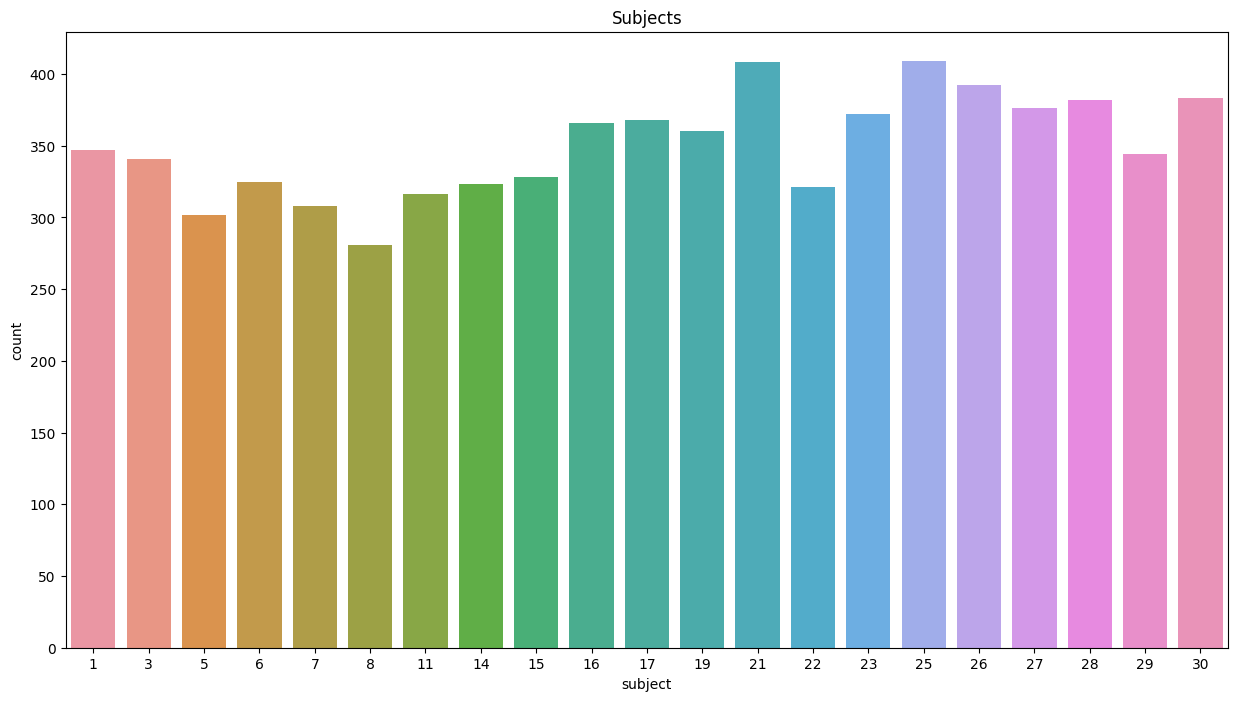

In [22]:
plt.figure(figsize = (15,8))
plt.title('Subjects')
sns.countplot(x = 'subject', data = df_train);

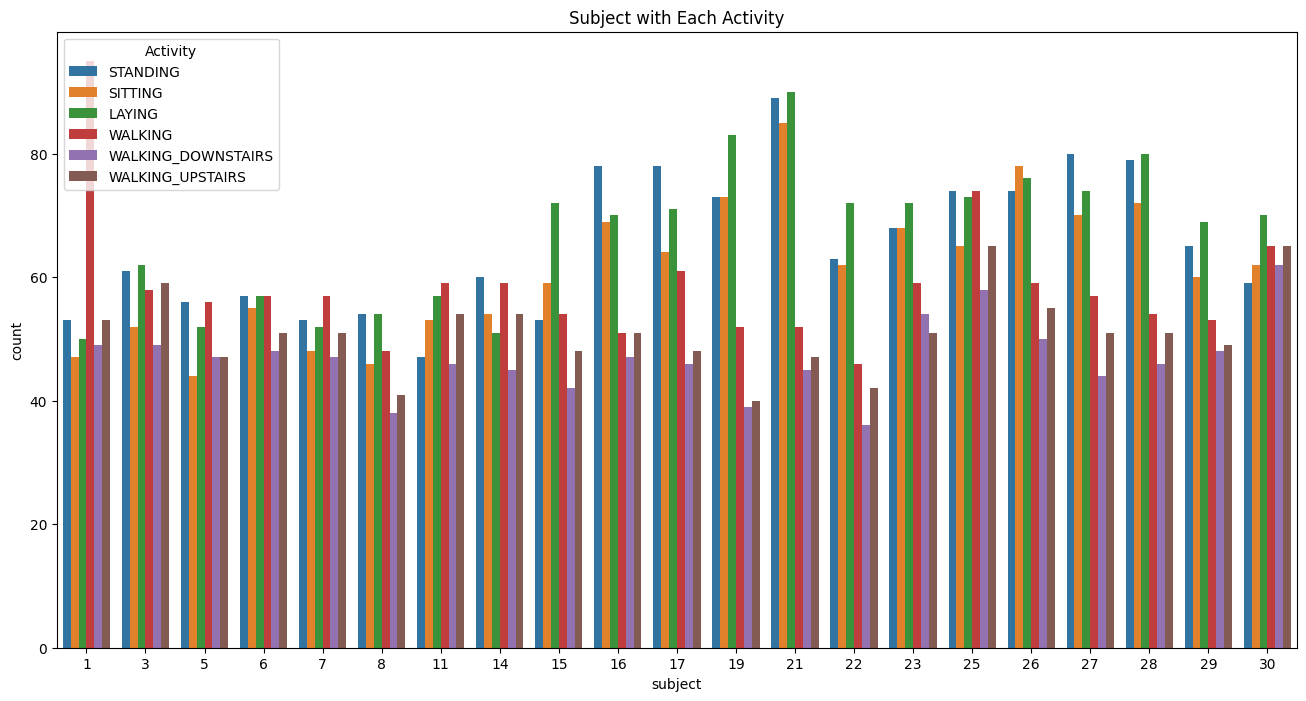

In [23]:
plt.figure(figsize = (16,8))
plt.title("Subject with Each Activity")
sns.countplot(hue = 'Activity', x='subject',data = df_train);
plt.show()

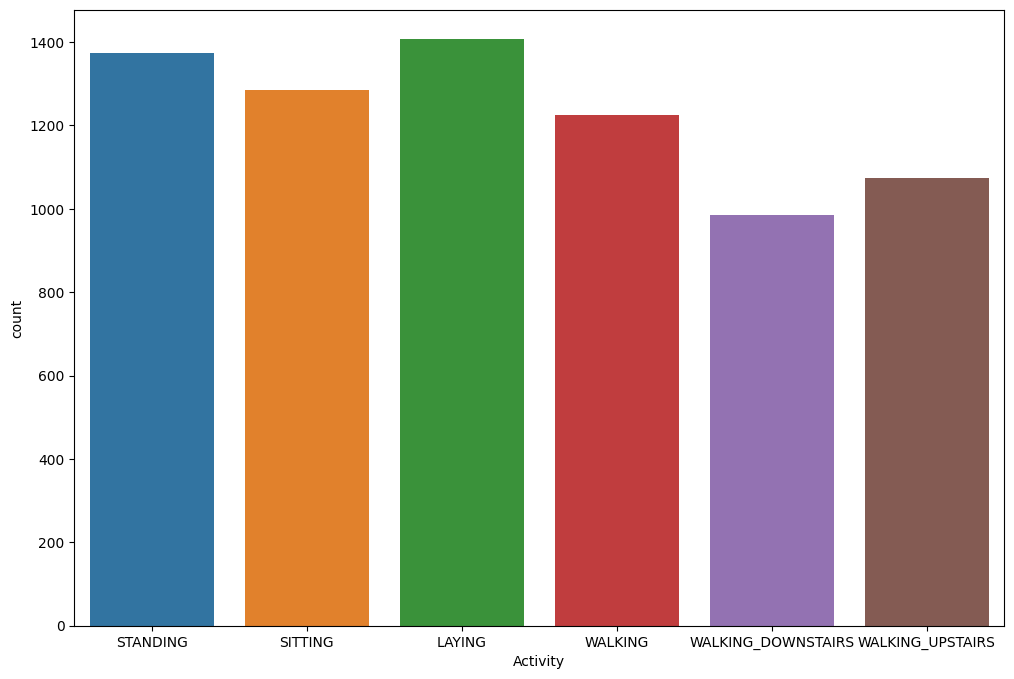

In [24]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = df_train);

We can clearly see, each subjects has almost equal or less amount of data. There is no any huge amount of gap between them.

### 2.4 Correcting some feature names


In [25]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


We can see, some () 'bracket' between the feature's name. We will remove all these brackets quickly. So it's easier for us to type correctly later.

In [26]:
columns = df_train.columns

## Removing ()

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')


In [27]:
df_train.columns = columns
df_test.columns = columns

In [28]:
df_train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

## 3. Exploratory Data Analysis


#### Static and Dynamic Activites

- Static activities are (sit, stand, lie and down) thus there is no any motion of an object. 
- Dynamic activities (Walking, WalkingUpStairs, WalkingDownStairs) motion info will be significant



#### 2. Stationary and Moving activities are completely different

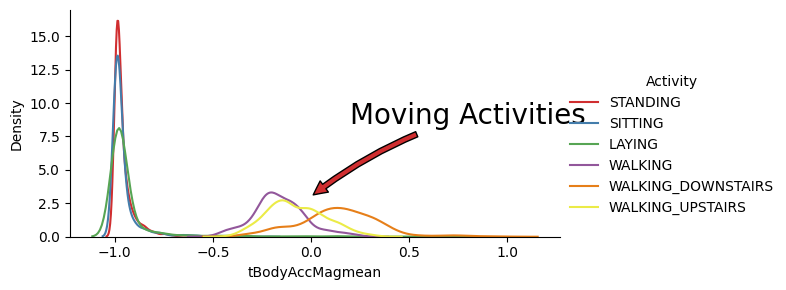

In [36]:
import seaborn as sns
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df_train, hue='Activity',aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,va='center', ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Let's take a closer look at them

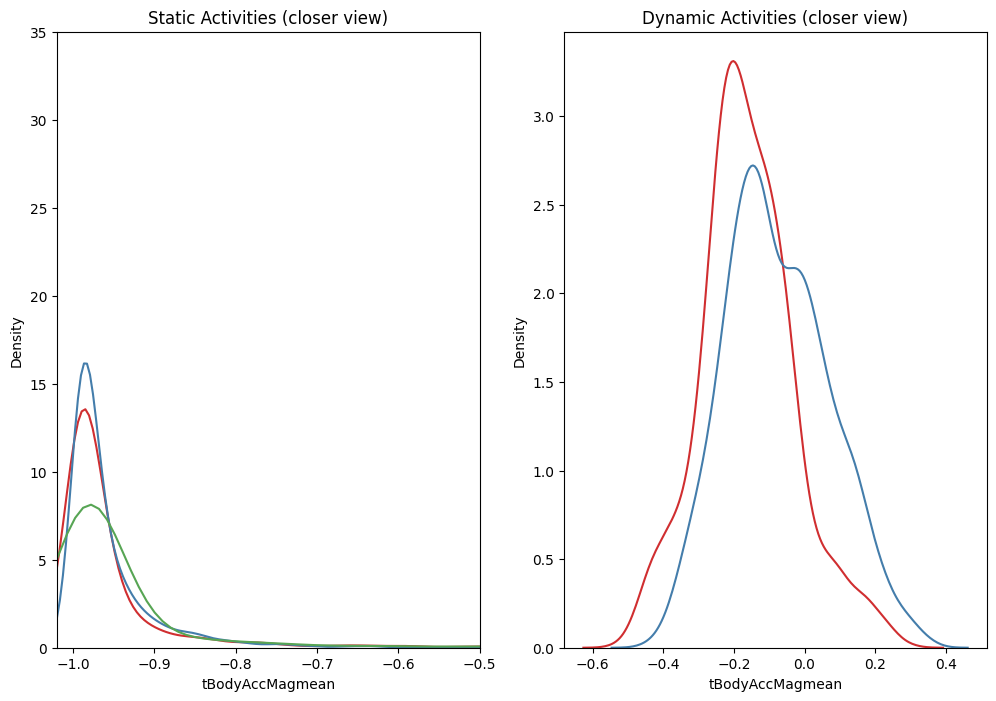

In [37]:
## 

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities (closer view)")
sns.distplot(df_train[df_train["Activity"]=="SITTING"]['tBodyAccMagmean'], hist = False, label = 'Sitting');
sns.distplot(df_train[df_train["Activity"]=="STANDING"]['tBodyAccMagmean'], hist = False, label = 'Standing');
sns.distplot(df_train[df_train["Activity"]=="LAYING"]['tBodyAccMagmean'], hist = False, label = 'Laying');
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(df_train[df_train["Activity"]=="WALKING"]["tBodyAccMagmean"], hist = False, label ="Sitting");
sns.distplot(df_train[df_train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'], hist = False, label = 'Laying');

We will also, use box plot to visulaize

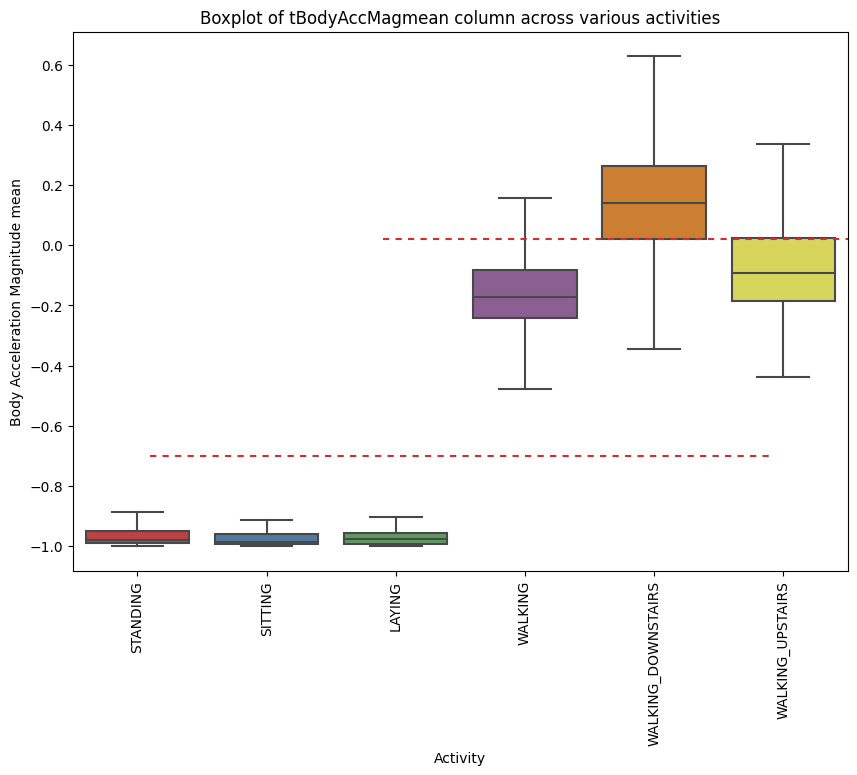

In [38]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = df_train, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.axhline(y =- 0.7, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

Using boxplot agian, we can come with conditions to seperate static activities from dynamic activities.

`` if(tBodyAccMagmean <= -0.8):
      Activity = "static"
  if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"
 ``
 

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

`` 
if (tBodyAccMagmean > 0.02):
    Activity = "WALKING_DOWNSTARIS"
else:
    Activity = "others"
``

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as others so this condition makes an error of 25% in classification.

#### 3.2 Analysing Angle between X-axis and gravityMean feature

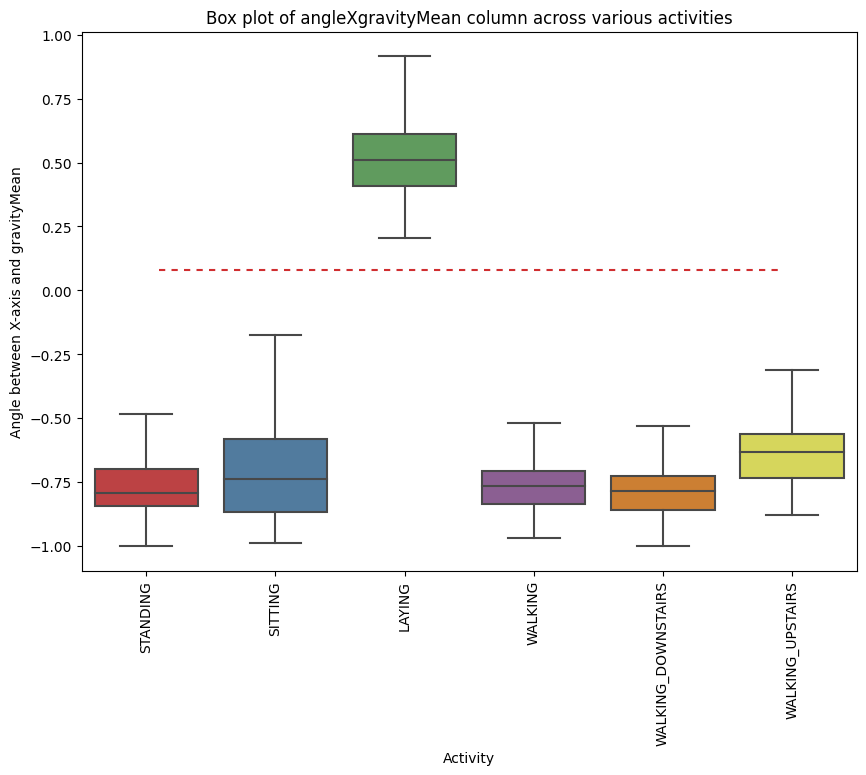

In [39]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleXgravityMean', data = df_train, showfliers = False)
plt.axhline(y = 0.08, xmin = 0.1 , xmax = 0.9, dashes = (3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Box plot of angleXgravityMean column across various activities")
plt.xticks(rotation = 90)
plt.show()

<b> Observation: </b>
- If angleXgravityMean > 0.01 then Activity is <b> Laying </b>
- We can classify all datapoints belonging to Laying activity with just a single if else statement



#### 3.3 Analysing Angle between Y-axis and gravityMean feature

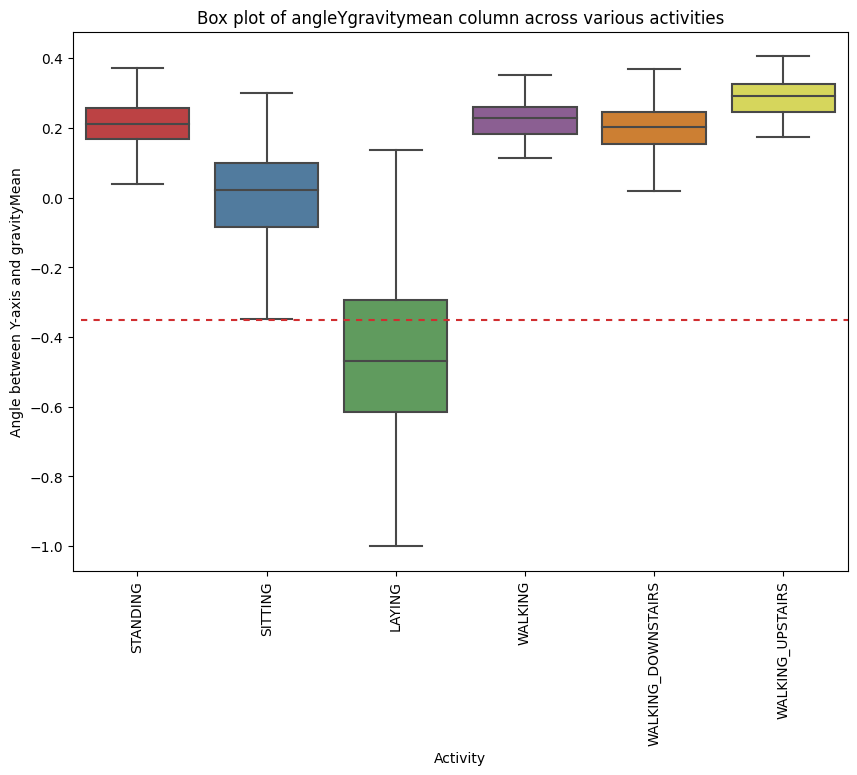

In [40]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleYgravityMean', data = df_train, showfliers = False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title("Box plot of angleYgravitymean column across various activities")
plt.xticks(rotation = 90)
plt.axhline(y = -0.35, xmin = 0.01, dashes = (3,3))
plt.show()

#### 3.4 Visualizing data using t-SNE

Using t-SNE data can be visualized from a extermely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unique featuers, using t-SNE let's visualze it to a 2D space.

In [41]:
from sklearn.manifold import TSNE

In [42]:
X_for_tsne = df_train.drop(['subject','Activity'], axis = 1)

In [43]:
%time
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.030s...
[t-SNE] Computed neighbors for 7352 samples in 2.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.090317
[t-SNE] KL divergence after 1000 iterations: 1.295007


<Axes: >

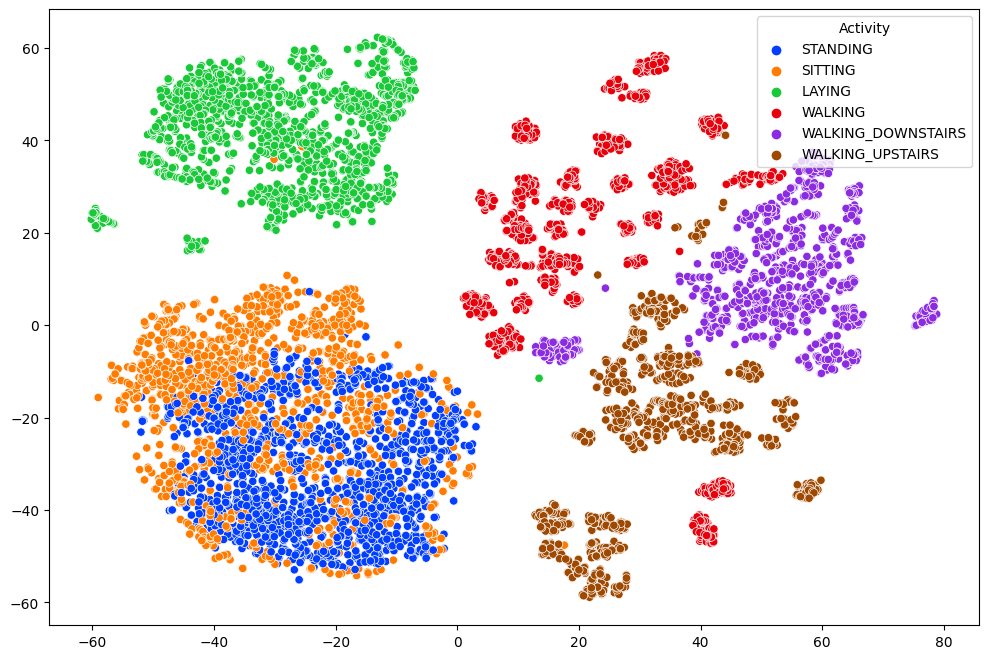

In [44]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_train["Activity"], palette = "bright")

<b>Observations:</b>
- Laying is totally different position
- Walking, Walking_downstaris, Walking_upstairs are some kind of similar so they are clustered together
- And, Standing and Sitting are also some kind of same position.

## 4. Data Preprocessing







#### 4.1 Splitting training and testing

In [45]:
y_train = df_train.Activity
X_train = df_train.drop(['subject','Activity'], axis = 1)
y_test = df_test.Activity
X_test = df_test.drop(['subject','Activity'], axis = 1)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7352, 561)
Test data size: (2947, 561)


In [46]:
model_score = pd.DataFrame(columns = ("Model","Score"))

## 5. Models, HyperparamterTuning and Cross Validations
- Logistic Regression 
- Linear SVM
- Kernel SVM
- Decision Tree
- Random Forest



#### 5.1 Logistic regression model with Hyperparameter tuning and cross validation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [48]:
parameters = {'C':np.arange(10,61,10),'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [49]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Logisitc Regression:", lr_accuracy)

Accuracy using Logisitc Regression: 0.9565659993213438


In [50]:
model_score = model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[lr_accuracy]}))

In [51]:
lr_classifier_rs.best_estimator_

LogisticRegression(C=60)

In [52]:
## plotting confusion matrix

def plot_confusion_matrix(cm, lables):
    fig, ax = plt.subplots(figsize = (12,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]))
    yticks = np.arange(cm.shape[0])
    ylabel = 'True label'
    xlabel = 'Predicted label'
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black")
            fig.tight_layout()

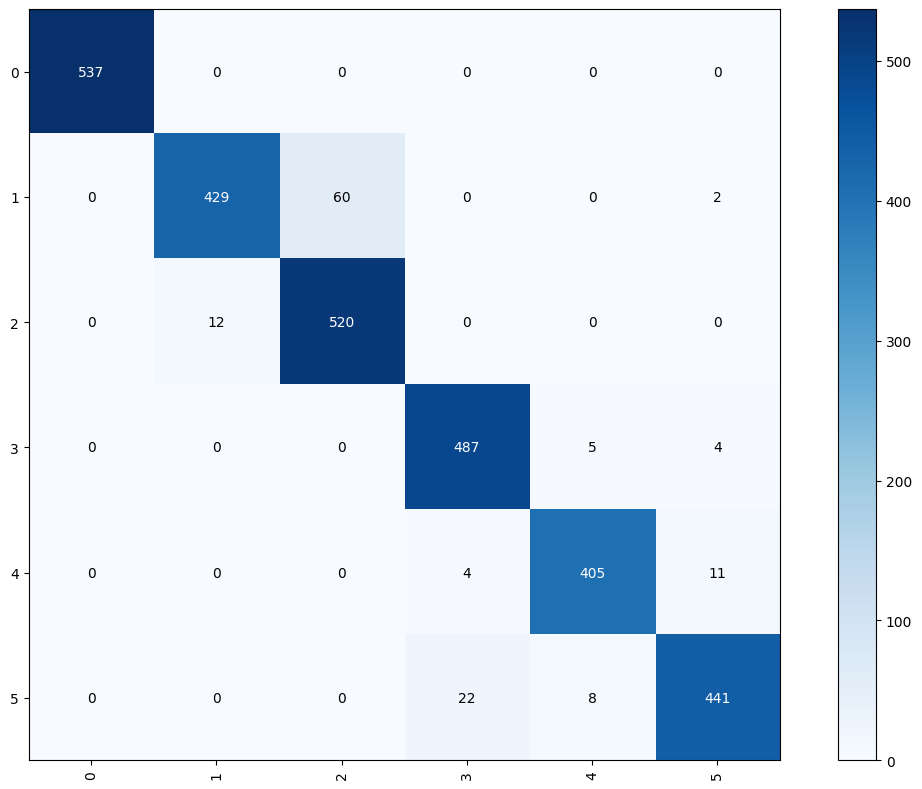

In [53]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [54]:
## function to get best random search attributes

def get_best_randomsearch_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best set of parameters:", model.best_params_)
    print("Best score:", model.best_score_)

In [55]:
## getting best random search attributes

get_best_randomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(C=60)
Best set of parameters: {'penalty': 'l2', 'C': 60}
Best score: 0.9334939903901738


#### 4.2 Linear SVM model with Hyperparameter tuning and cross validation

In [56]:
from sklearn.svm import LinearSVC

In [57]:
parameters = {'C': np.arange(1,12,2)}
lr_svm = LinearSVC(tol = 0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions = parameters, random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [58]:
lr_svm_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Linear SVM:", lr_svm_accuracy)

Accuracy using Linear SVM: 0.9647098744485918


In [59]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[lr_svm_accuracy]}))

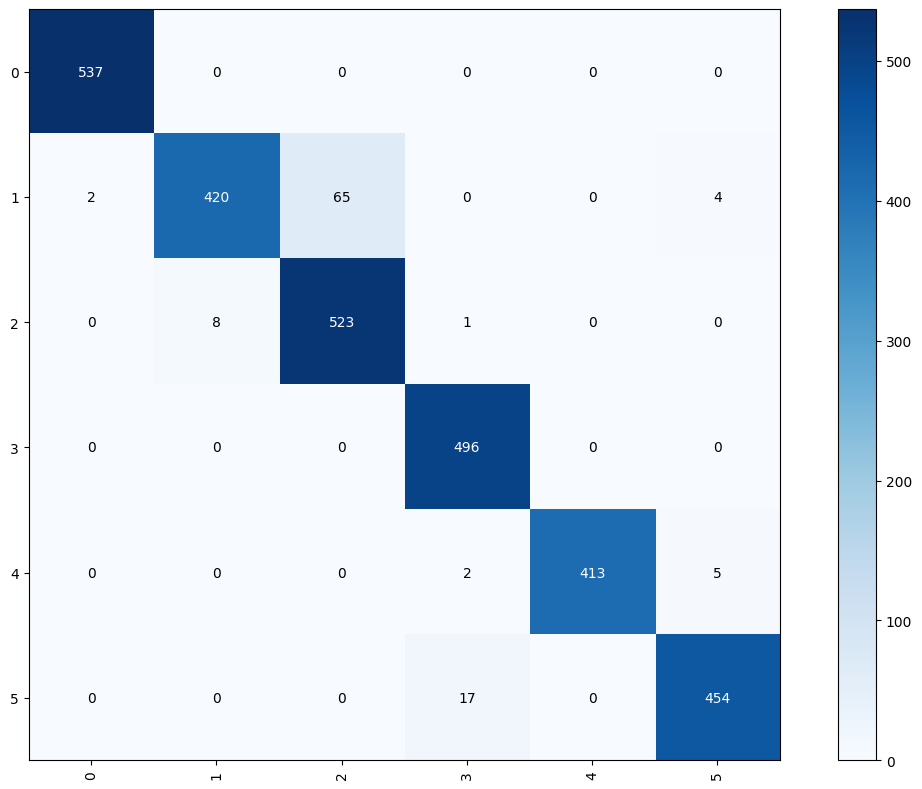

In [60]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [61]:
## getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator: LinearSVC(C=1, tol=5e-05)
Best set of parameters: {'C': 1}
Best score: 0.9416557758385476


#### 5.3 Kernel SVM model with Hyperparameter tuning and cross validation

In [62]:
from sklearn.svm import SVC

In [63]:
np.linspace(2,22, 6)

array([ 2.,  6., 10., 14., 18., 22.])

In [64]:
parameters = {'C':[2,4,8,16], 'gamma':[0.125, 0.250, 0.5, 1]}
kernel_svm = SVC(kernel = 'rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm, param_distributions = parameters, random_state = 42)
kernel_svm_rs.fit(X_train, y_train)
y_pred = kernel_svm_rs.predict(X_test)

In [65]:
kernel_svm_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Kernel SVM:", kernel_svm_accuracy)

Accuracy using Kernel SVM: 0.9423142178486597


In [66]:
model_score = model_score.append(pd.DataFrame({'Model':["KernelSVM"],'Score':[kernel_svm_accuracy]}))

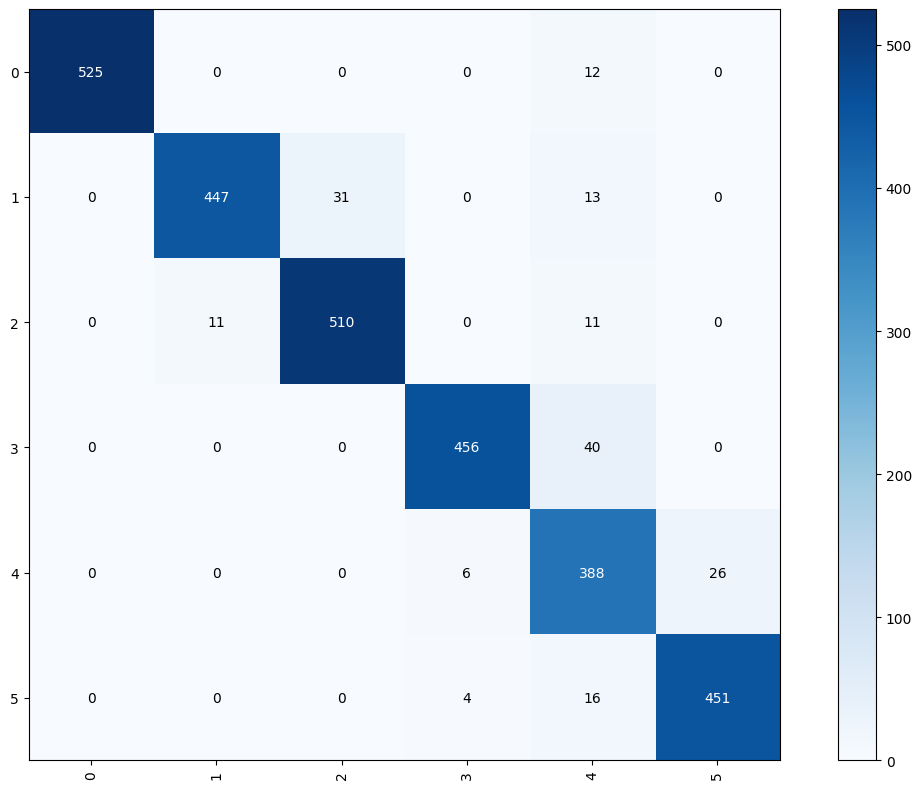

In [67]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [68]:
## getting best random search attributes

get_best_randomsearch_results(kernel_svm_rs)

Best estimator: SVC(C=8, gamma=0.125)
Best set of parameters: {'gamma': 0.125, 'C': 8}
Best score: 0.896632121237346


#### 5.4 Decision tree model with Hyperparameter tuning and cross validation

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [71]:
dt_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Decision tree:", dt_accuracy)

Accuracy using Decision tree: 0.8730912792670512


In [72]:
model_score = model_score.append(pd.DataFrame({'Model':["DecisionTrees"],'Score':[dt_accuracy]}))

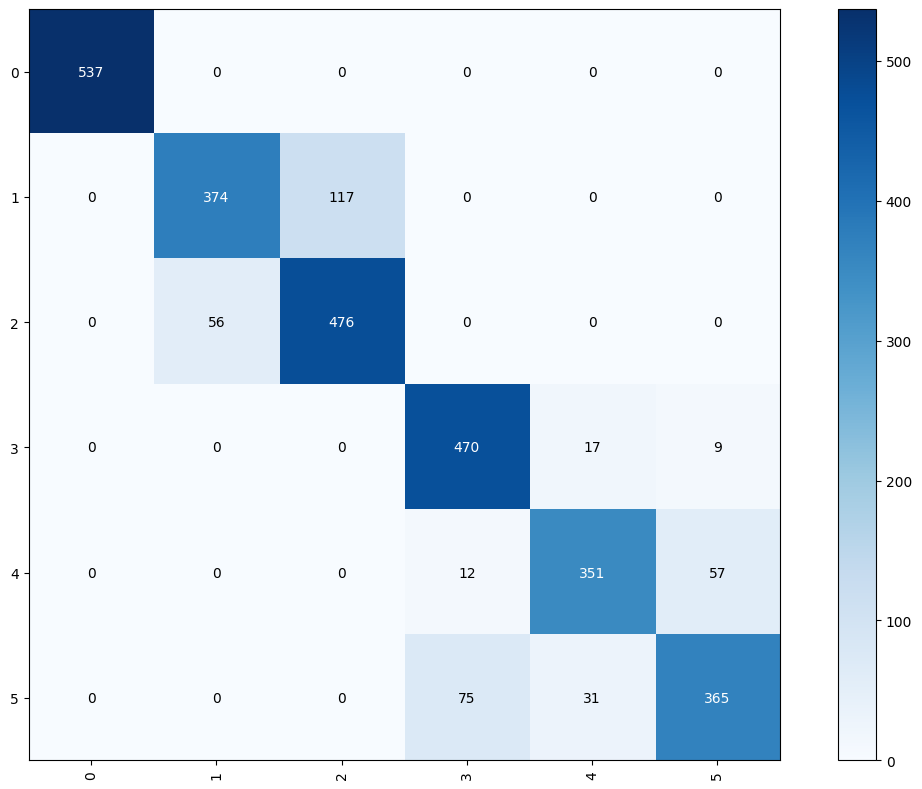

In [73]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [74]:
## getting best estimators

get_best_randomsearch_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(max_depth=8)
Best set of parameters: {'max_depth': 8}
Best score: 0.8488936675962023


#### 5.5 Random Forest model using Hyperparameter tuning and cross validation

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [77]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random Forest:", rf_accuracy)

Accuracy using Random Forest: 0.9267051238547676


In [78]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[rf_accuracy]}))

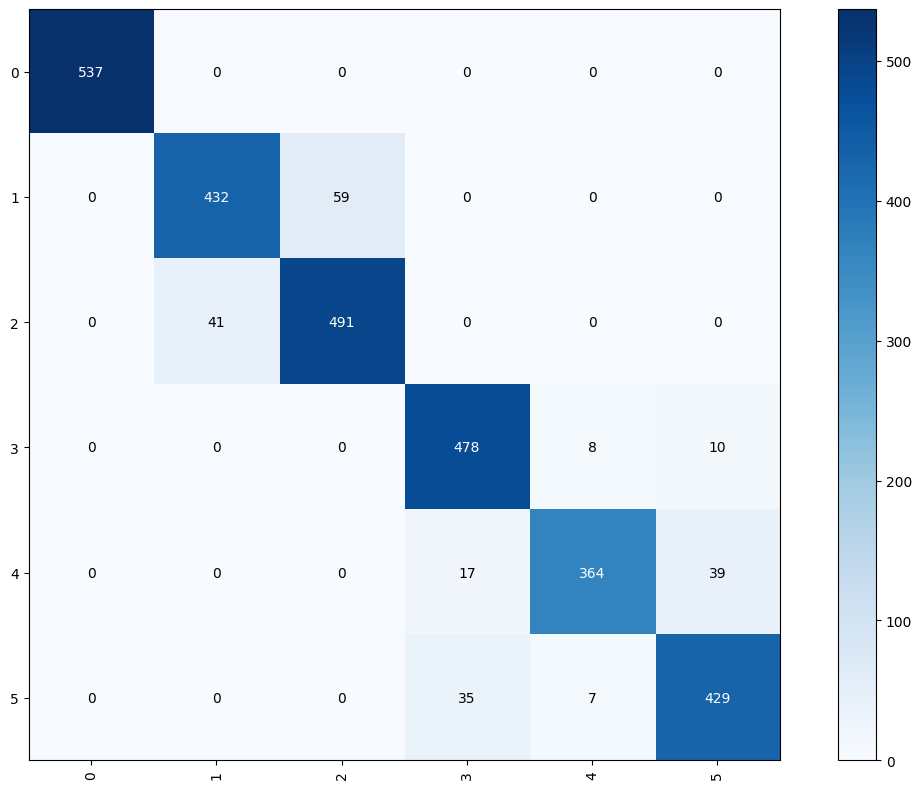

In [79]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [80]:
model_score.head()

,Model,Score
0,LogisticRegression,0.956566
0,LinearSVM,0.964710
0,KernelSVM,0.942314
0,DecisionTrees,0.873091
0,RandomForest,0.926705
